In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi

# Chapter 4<br>Least Squares

## 4.2 A Survey of Models

In [3]:
def ls(A, b):
    return np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)

In [4]:
def coef(x_i, y_i, degree):
    n = len(x_i)
    
    A = np.zeros((degree, n), dtype=x_i.dtype)
    for i in range(degree):
        A[i] = x_i**i
    A = A.T
    b = y_i
    
    return ls(A, b)

In [5]:
def fit(x_i, y_i, degree):
    c = coef(x_i, y_i, degree)

    def f(x):
        ans = 0
        for i in range(degree):
            ans += c[i] * (x**i)
        return ans
    
    return f

### Q. 1

In [6]:
oil = np.array([6.224, 6.665, 6.241, 5.302, 5.073, 5.127, 4.994, 5.012, 5.108, 5.377, 5.510, 6.372])
month = np.linspace(0, 1, 12)

In [7]:
A = np.ones((4, 12))
A[1] = np.cos(2*pi*month)
A[2] = np.sin(2*pi*month)
A[3] = np.cos(4*pi*month)
A = A.T
b = oil

c = ls(A, b)
def f(x):
    return c[0] + c[1]*np.cos(2*pi*x) + c[2]*np.sin(2*pi*x) + c[3]*np.cos(4*pi*x)

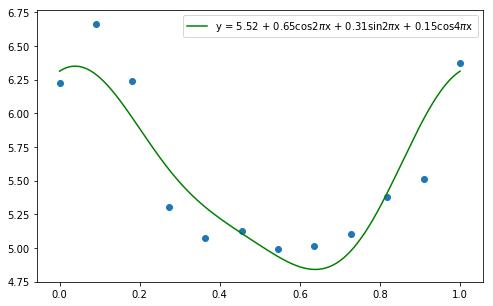

In [8]:
x_range = np.linspace(0, 1, 1000)
y_range = f(x_range)

plt.figure(figsize=(8, 5))
plt.scatter(month, oil)
plt.plot(x_range, y_range, c='g', label="y = %.2f + %.2fcos2$\pi$x + %.2fsin2$\pi$x + %.2fcos4$\pi$x" % (c[0], c[1], c[2], c[3]))
plt.legend()

plt.show()

In [9]:
error = np.sqrt(sum((oil - f(month))**2) / 12)
print("RMSE: %f" % error)

RMSE: 0.225967


### Q. 2

In [10]:
# NY, Sat, May 26, 2018
temp = np.array([24.4, 23.9, 23.3, 22.8, 22.8, 22.8, 22.8, 22.8, 24.4, 27.2, 28.3, 29.4, 31.1, 31.7, 30.6, 30.6, 29.4, 30.6, 28.9, 26.7, 26.7, 25.6, 26.7, 26.1])
hour = np.linspace(0, 1, 24)

In [11]:
A0 = np.ones((3, 24))
A0[1] = np.cos(2*pi*hour)
A0[2] = np.sin(2*pi*hour)
A0 = A0.T
b0 = temp

c0 = ls(A0, b0)
def f0(x):
    return c0[0] + c0[1]*np.cos(2*pi*x) + c0[2]*np.sin(2*pi*x)

In [12]:
A1 = np.ones((4, 24))
A1[1] = np.cos(2*pi*hour)
A1[2] = np.sin(2*pi*hour)
A1[3] = np.cos(4*pi*hour)
A1 = A1.T
b1 = temp

c1 = ls(A1, b1)
def f1(x):
    return c1[0] + c1[1]*np.cos(2*pi*x) + c1[2]*np.sin(2*pi*x) + c1[3]*np.cos(4*pi*x)

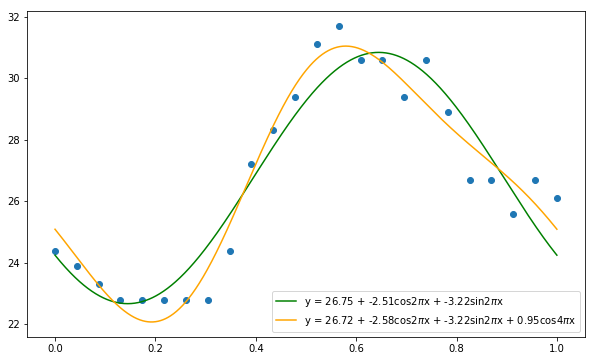

In [13]:
x_range = np.linspace(0, 1, 1000)
y0_range = f0(x_range)
y1_range = f1(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(hour, temp)
plt.plot(x_range, y0_range, c='g', label="y = %.2f + %.2fcos2$\pi$x + %.2fsin2$\pi$x" % (c0[0], c0[1], c0[2]))
plt.plot(x_range, y1_range, c='orange', label="y = %.2f + %.2fcos2$\pi$x + %.2fsin2$\pi$x + %.2fcos4$\pi$x" % (c1[0], c1[1], c1[2], c1[3]))
plt.legend()

plt.show()

### Q. 3

In [14]:
year = np.array([1960, 1970, 1990, 2000])
population = np.array([3039585530, 3707475887, 5281653820, 6079603571])

f = fit(year, np.log(population), 2)

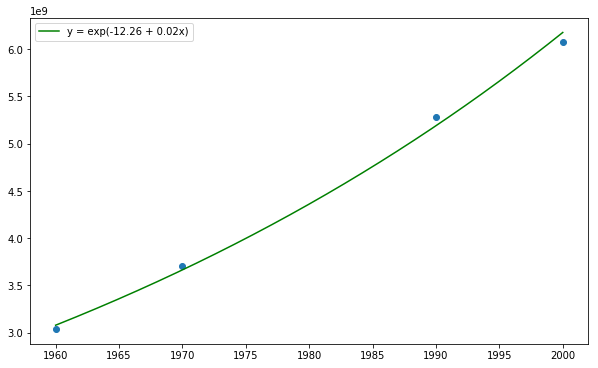

In [15]:
x_range = np.linspace(1960, 2000, 1000)
y_range = np.exp(f(x_range))
c = coef(year, np.log(population), 2)

plt.figure(figsize=(10, 6))
plt.scatter(year, population)
plt.plot(x_range, y_range, c='g', label="y = exp(%.2f + %.2fx)" % (c[0], c[1]))
plt.legend()

plt.show()

In [16]:
estimation = np.exp(f(1980))
pop_1980 = 4452584592

print("Estimation: %f" % estimation)
print("Error: %f" % abs(estimation - pop_1980))

Estimation: 4361485915.310748
Error: 91098676.689252


### Q. 4

In [17]:
carbon = np.array([280, 283, 291, 370]) - 279
year = np.array([1800, 1850, 1900, 2000])

f = fit(year, np.log(carbon), 2)

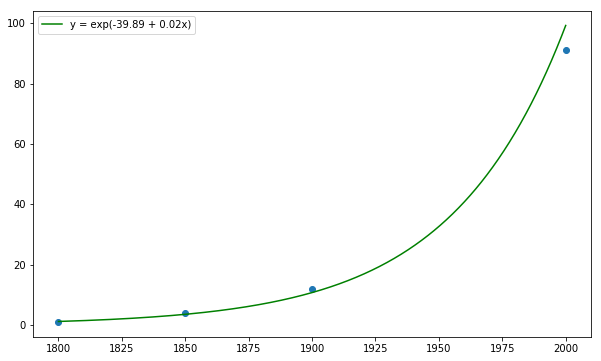

In [18]:
x_range = np.linspace(1800, 2000, 1000)
y_range = np.exp(f(x_range))
c = coef(year, np.log(carbon), 2)

plt.figure(figsize=(10, 6))
plt.scatter(year, carbon)
plt.plot(x_range, y_range, c='g', label="y = exp(%.2f + %.2fx)" % (c[0], c[1]))
plt.legend()

plt.show()

In [19]:
estimation = np.exp(f(1980)) + 279
carbon_1950 = 310

print("Estimation: %f" % estimation)
print("Error: %f" % abs(estimation - carbon_1950))

Estimation: 342.619105
Error: 32.619105


### Q. 5

In [20]:
# (a)
# y' = c1*exp(c2*t) + c1*c2*t*exp(c2*t)
print("The model attains its maximum value at x = -1/c2")

The model attains its maximum value at x = -1/c2


In [21]:
hour = np.arange(8) + 1
concentration = np.array([8.0, 12.3, 15.5, 16.8, 17.1, 15.8, 15.2, 14.0])

In [22]:
A = np.ones((2, 8))
A[1] = hour
A = A.T
b = np.log(concentration) - np.log(hour)

c = ls(A, b)
def f(x):
    return x*np.exp(c[0] + c[1]*x)

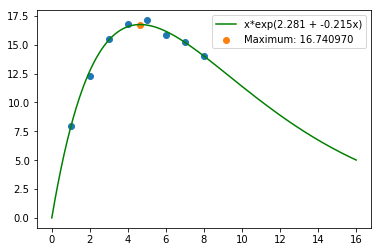

In [23]:
x_range = np.linspace(0, 16, 1000)
y_range = f(x_range)

plt.scatter(hour, concentration)
plt.scatter(-1/c[1], f(-1/c[1]), label="Maximum: %f" % f(-1/c[1]))
plt.plot(x_range, y_range, c='g', label="x*exp(%.3f + %.3fx)" % (c[0], c[1]))
plt.legend()

plt.show()

In [24]:
# (b)
# 2*(x+t)*exp(c[0] + c[1]*(x+t)) = x*exp(c[0] + c[1]*x) (x = -1/c[1])
# -> 2*(1 - c[1]*t) = exp(-c[1]*t)
# Use bisection method!
a, b = 0, 20
m = (a + b)/2

def half_life(x):
    return 2*(1 - c[1]*x) - np.exp(-c[1]*x)

for i in range(1000):
    if half_life(m) < 0:
        b = m
        m = (a + b)/2
    elif half_life(m) > 0:
        a = m
        m = (a + b)/2
    else:
        break

print("Half-life: %f" % m)  

Half-life: 7.801302


### Q. 6

In [25]:
concentration = np.array([6.2, 9.5, 12.3, 13.9, 14.6, 13.5, 13.3, 12.7, 12.4, 11.9])
hour = np.arange(10) + 1

In [26]:
A = np.ones((2, 10))
A[1] = hour
A = A.T
b = np.log(concentration) - np.log(hour)

c = ls(A, b)
def f(x):
    return x*np.exp(c[0] + c[1]*x)

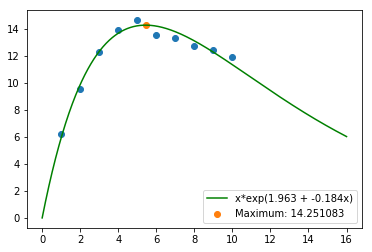

In [27]:
x_range = np.linspace(0, 16, 1000)
y_range = f(x_range)

plt.scatter(hour, concentration)
plt.scatter(-1/c[1], f(-1/c[1]), label="Maximum: %f" % f(-1/c[1]))
plt.plot(x_range, y_range, c='g', label="x*exp(%.3f + %.3fx)" % (c[0], c[1]))
plt.legend()

plt.show()

In [28]:
a, b = 0, 20
m = (a + b)/2

def half_life(x):
    return 2*(1 - c[1]*x) - np.exp(-c[1]*x)

for i in range(1000):
    if half_life(m) < 0:
        b = m
        m = (a + b)/2
    elif half_life(m) > 0:
        a = m
        m = (a + b)/2
    else:
        break

print("Half-life: %f" % m)  

Half-life: 9.128944


In [29]:
a0, a1, b0, b1 = 0, 10, 10, 20
m0, m1 = (a0 + b0)/2, (a1 + b1)/2

for i in range(1000):
    if f(m0) < 4:
        a0 = m0
        m0 = (a0 + b0)/2
    elif f(m0) > 4:
        b0 = m0
        m0 = (a0 + b0)/2
    else:
        break

for i in range(1000):
    if f(m1) > 4:
        a1 = m1
        m1 = (a1 + b1)/2
    elif f(m1) < 4:
        b1 = m1
        m1 = (a1 + b1)/2
    else:
        break
    
print("Therapeutic time range: %.2fh ~ %.2fh" % (m0, m1))

Therapeutic time range: 0.63h ~ 19.21h


### Q. 7

In [30]:
windmill = np.loadtxt("windmill.txt", dtype=int)
month = np.linspace(0, 5, 61)[:-1]

In [31]:
# (a)
A = np.ones((4, 60))
A[1] = np.cos(2*pi*month)
A[2] = np.sin(2*pi*month)
A[3] = np.cos(4*pi*month)
A = A.T
b = windmill

c = ls(A, b)
def f(x):
    return c[0] + c[1]*np.cos(2*pi*x) + c[2]*np.sin(2*pi*x) + c[3]*np.cos(4*pi*x)

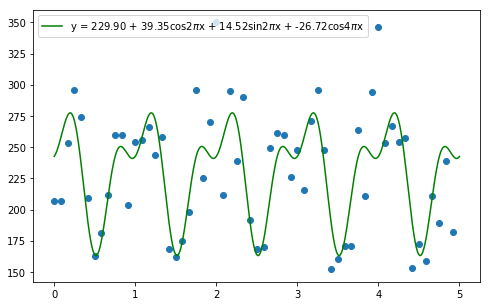

In [32]:
# (b)
x_range = np.linspace(0, 5, 1000)
y_range = f(x_range)

plt.figure(figsize=(8, 5))
plt.scatter(month, windmill)
plt.plot(x_range, y_range, c='g', label="y = %.2f + %.2fcos2$\pi$x + %.2fsin2$\pi$x + %.2fcos4$\pi$x" % (c[0], c[1], c[2], c[3]))
plt.legend()

plt.show()

Feature: The data seems to be periodic.

### Q . 8

In [33]:
scrippsy = np.loadtxt("scrippsy.txt") - 279
year = np.arange(1961, 2011)

f = fit(year, np.log(scrippsy), 2)

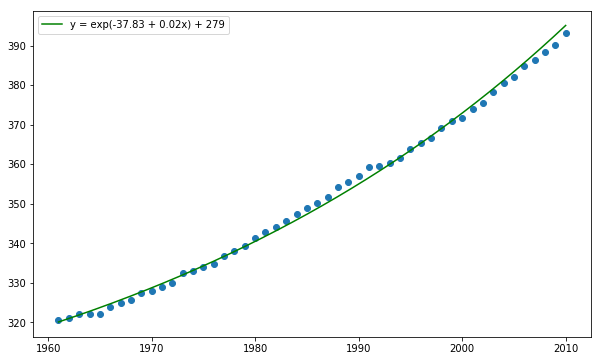

In [34]:
x_range = np.linspace(1961, 2010, 1000)
y_range = np.exp(f(x_range))
c = coef(year, np.log(scrippsy), 2)

plt.figure(figsize=(10, 6))
plt.scatter(year, scrippsy + 279)
plt.plot(x_range, y_range + 279, c='g', label="y = exp(%.2f + %.2fx) + 279" % (c[0], c[1]))
plt.legend()

plt.show()

In [35]:
error = np.sqrt(sum((scrippsy - np.exp(f(year)))**2) / 50)
print("RMSE: %f" % error)

RMSE: 1.180921


### Q. 9

In [36]:
scrippsm = np.loadtxt("scrippsm.txt")
month = np.linspace(0, 15, 181)[:-1]

In [37]:
# (a)
A = np.ones((4, 180))
A[1] = month
A[2] = np.cos(2*pi*month)
A[3] = np.sin(2*pi*month)
A = A.T
b = scrippsm

c = ls(A, b)
def f(x):
    return c[0] + c[1]*x + c[2]*np.cos(2*pi*x) + c[3]*np.sin(2*pi*x)

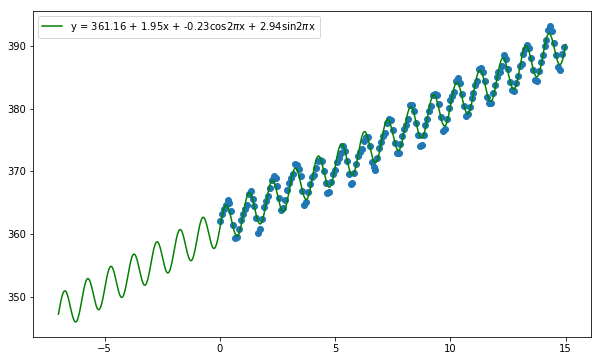

In [38]:
x_range = np.linspace(-7, 15, 1000)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(month, scrippsm)
plt.plot(x_range, y_range, c='g', label="y = %.2f + %.2fx + %.2fcos2$\pi$x + %.2fsin2$\pi$x" % (c[0], c[1], c[2], c[3]))
plt.legend()

plt.show()

In [39]:
error = np.sqrt(sum((scrippsm - f(month))**2) / 180)
print("RMSE: %f" % error)

RMSE: 0.801454


In [40]:
# (b)
may_2004, sept_2004, may_2005, sept_2005 = 8 + 1/3, 8 + 2/3, 9 + 1/3, 9 + 2/3
print("May 2004 Estimate: %f / Error: %f" % (f(may_2004), abs(f(may_2004) - 380.63)))
print("Sept 2004 Estimate: %f / Error: %f" % (f(sept_2004), abs(f(sept_2004) - 374.06)))
print("May 2005 Estimate: %f / Error: %f" % (f(may_2005), abs(f(may_2005) - 382.45)))
print("Sept 2005 Estimate: %f / Error: %f" % (f(sept_2005), abs(f(sept_2005) - 376.73)))

May 2004 Estimate: 380.077446 / Error: 0.552554
Sept 2004 Estimate: 375.630272 / Error: 1.570272
May 2005 Estimate: 382.028123 / Error: 0.421877
Sept 2005 Estimate: 377.580950 / Error: 0.850950


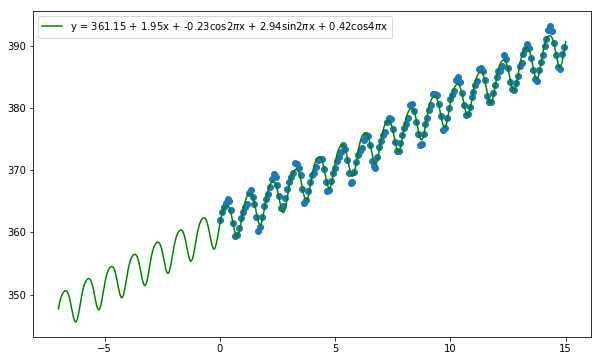

In [41]:
# (c)
A = np.ones((5, 180))
A[1] = month
A[2] = np.cos(2*pi*month)
A[3] = np.sin(2*pi*month)
A[4] = np.cos(4*pi*month)
A = A.T
b = scrippsm

c = ls(A, b)
def f(x):
    return c[0] + c[1]*x + c[2]*np.cos(2*pi*x) + c[3]*np.sin(2*pi*x) + c[4]*np.cos(4*pi*x)

x_range = np.linspace(-7, 15, 1000)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(month, scrippsm)
plt.plot(x_range, y_range, c='g', label="y = %.2f + %.2fx + %.2fcos2$\pi$x + %.2fsin2$\pi$x + %.2fcos4$\pi$x" % (c[0], c[1], c[2], c[3], c[4]))
plt.legend()

plt.show()

In [42]:
error = np.sqrt(sum((scrippsm - f(month))**2) / 180)
print("RMSE: %f" % error)

may_2004, sept_2004, may_2005, sept_2005 = 8 + 1/3, 8 + 2/3, 9 + 1/3, 9 + 2/3
print("May 2004 Estimate: %f / Error: %f" % (f(may_2004), abs(f(may_2004) - 380.63)))
print("Sept 2004 Estimate: %f / Error: %f" % (f(sept_2004), abs(f(sept_2004) - 374.06)))
print("May 2005 Estimate: %f / Error: %f" % (f(may_2005), abs(f(may_2005) - 382.45)))
print("Sept 2005 Estimate: %f / Error: %f" % (f(sept_2005), abs(f(sept_2005) - 376.73)))

RMSE: 0.743125
May 2004 Estimate: 379.866227 / Error: 0.763773
Sept 2004 Estimate: 375.418859 / Error: 1.358859
May 2005 Estimate: 381.817850 / Error: 0.632150
Sept 2005 Estimate: 377.370483 / Error: 0.640483


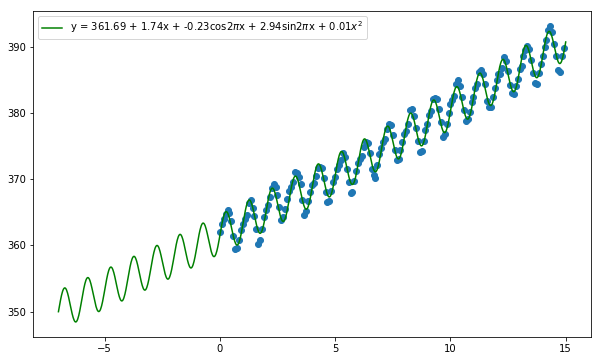

In [43]:
# (d)
A = np.ones((5, 180))
A[1] = month
A[2] = np.cos(2*pi*month)
A[3] = np.sin(2*pi*month)
A[4] = month**2
A = A.T
b = scrippsm

c = ls(A, b)
def f(x):
    return c[0] + c[1]*x + c[2]*np.cos(2*pi*x) + c[3]*np.sin(2*pi*x) + c[4]*x**2

x_range = np.linspace(-7, 15, 1000)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(month, scrippsm)
plt.plot(x_range, y_range, c='g', label="y = %.2f + %.2fx + %.2fcos2$\pi$x + %.2fsin2$\pi$x + %.2f$x^2$" % (c[0], c[1], c[2], c[3], c[4]))
plt.legend()

plt.show()

In [44]:
error = np.sqrt(sum((scrippsm - f(month))**2) / 180)
print("RMSE: %f" % error)

may_2004, sept_2004, may_2005, sept_2005 = 8 + 1/3, 8 + 2/3, 9 + 1/3, 9 + 2/3
print("May 2004 Estimate: %f / Error: %f" % (f(may_2004), abs(f(may_2004) - 380.63)))
print("Sept 2004 Estimate: %f / Error: %f" % (f(sept_2004), abs(f(sept_2004) - 374.06)))
print("May 2005 Estimate: %f / Error: %f" % (f(may_2005), abs(f(may_2005) - 382.45)))
print("Sept 2005 Estimate: %f / Error: %f" % (f(sept_2005), abs(f(sept_2005) - 376.73)))

RMSE: 0.765021
May 2004 Estimate: 379.822254 / Error: 0.807746
Sept 2004 Estimate: 375.384334 / Error: 1.324334
May 2005 Estimate: 381.812108 / Error: 0.637892
Sept 2005 Estimate: 377.383686 / Error: 0.653686


Term cos4$\pi x$ improves the model.

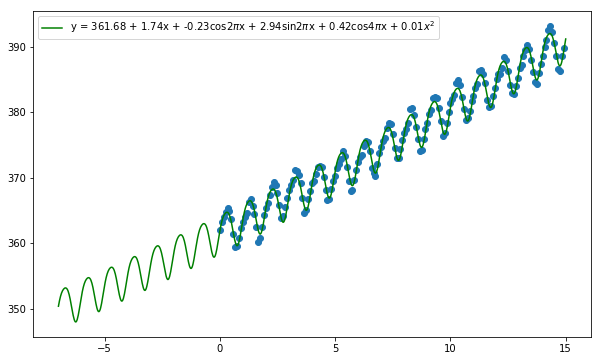

In [45]:
# (e)
A = np.ones((6, 180))
A[1] = month
A[2] = np.cos(2*pi*month)
A[3] = np.sin(2*pi*month)
A[4] = np.cos(4*pi*month)
A[5] = month**2
A = A.T
b = scrippsm

c = ls(A, b)
def f(x):
    return c[0] + c[1]*x + c[2]*np.cos(2*pi*x) + c[3]*np.sin(2*pi*x) + c[4]*np.cos(4*pi*x) + c[5]*x**2

x_range = np.linspace(-7, 15, 1000)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(month, scrippsm)
plt.plot(x_range, y_range, c='g', label="y = %.2f + %.2fx + %.2fcos2$\pi$x + %.2fsin2$\pi$x + %.2fcos4$\pi$x + %.2f$x^2$" % (c[0], c[1], c[2], c[3], c[4], c[5]))
plt.legend()

plt.show()

In [46]:
error = np.sqrt(sum((scrippsm - f(month))**2) / 180)
print("RMSE: %f" % error)

may_2004, sept_2004, may_2005, sept_2005 = 8 + 1/3, 8 + 2/3, 9 + 1/3, 9 + 2/3
print("May 2004 Estimate: %f / Error: %f" % (f(may_2004), abs(f(may_2004) - 380.63)))
print("Sept 2004 Estimate: %f / Error: %f" % (f(sept_2004), abs(f(sept_2004) - 374.06)))
print("May 2005 Estimate: %f / Error: %f" % (f(may_2005), abs(f(may_2005) - 382.45)))
print("Sept 2005 Estimate: %f / Error: %f" % (f(sept_2005), abs(f(sept_2005) - 376.73)))

RMSE: 0.703768
May 2004 Estimate: 379.611464 / Error: 1.018536
Sept 2004 Estimate: 375.173340 / Error: 1.113340
May 2005 Estimate: 381.602220 / Error: 0.847780
Sept 2005 Estimate: 377.173583 / Error: 0.443583


Adding more terms leads to improvement of the model.